<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-加载数据集" data-toc-modified-id="1-加载数据集-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1 加载数据集</a></span><ul class="toc-item"><li><span><a href="#1.1-加载训练集和测试集" data-toc-modified-id="1.1-加载训练集和测试集-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.1 加载训练集和测试集</a></span></li><li><span><a href="#1.2-认识数据集" data-toc-modified-id="1.2-认识数据集-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1.2 认识数据集</a></span></li><li><span><a href="#1.3-重新加载数据集" data-toc-modified-id="1.3-重新加载数据集-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>1.3 重新加载数据集</a></span></li><li><span><a href="#1.4-数据集分批" data-toc-modified-id="1.4-数据集分批-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>1.4 数据集分批</a></span></li></ul></li><li><span><a href="#2-ResNet18-模型" data-toc-modified-id="2-ResNet18-模型-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2 ResNet18 模型</a></span><ul class="toc-item"><li><span><a href="#2.1-建模" data-toc-modified-id="2.1-建模-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1 建模</a></span></li><li><span><a href="#2.2-编译模型" data-toc-modified-id="2.2-编译模型-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2 编译模型</a></span></li><li><span><a href="#2.3-训练" data-toc-modified-id="2.3-训练-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2.3 训练</a></span></li><li><span><a href="#2.4-保存模型" data-toc-modified-id="2.4-保存模型-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>2.4 保存模型</a></span></li><li><span><a href="#2.5-用模型测试——准确率" data-toc-modified-id="2.5-用模型测试——准确率-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>2.5 用模型测试——准确率</a></span></li></ul></li><li><span><a href="#3-总结：" data-toc-modified-id="3-总结：-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3 总结：</a></span></li></ul></div>

使用任何神经网络框架，对CIFAR-10进行分类    
http://www.cs.toronto.edu/~kriz/cifar.html     
训练集 50000，测试集 10000    
图像大小 32*32 彩色    
10个分类：ariplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck     

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/")


In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null !apt-get update -qq 2>&1 > /dev/null !apt-get -y install -qq google-drive-ocamlfuse fuse from google.colab import auth auth.authenticate_user() from oauth2client.client import GoogleCredentials creds = GoogleCredentials.get_application_default() import getpass !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} &1 | grep URL vcode = getpass.getpass() !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `apt-get install -y -qq software-properties-common python-software-properties module-init-tools !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null !apt-get update -qq 2>&1 > /dev/null !apt-get -y install -qq google-drive-ocamlfuse fuse from google.colab import auth auth.authenticate_user() from oauth2client.client import GoogleCredentials creds = GoogleCredentials.get_application_default() import getpass !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} &1 | grep URL vcode = getpass.getpass() !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}'


In [4]:
import time

import numpy as np

In [5]:
import torch
from  torch import nn
from torch import optim
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision.models import resnet50

In [6]:
from matplotlib import pyplot as plt

In [7]:
from tqdm.notebook import tqdm, trange

# 1 加载数据集 

```
CIFAR10(
    root,
    train=True,
    transform=None,
    target_transform=None,
    download=False,
)
```

## 1.1 加载训练集和测试集

In [8]:
# 数据加载
train_data = CIFAR10(root='./root/cifar10',
                     train=True,
                     transform=transforms.ToTensor(),
                     download=False)

test_data = CIFAR10(root='./root/cifar10',
                    train=False,
                    transform=transforms.ToTensor(),
                    download=False)

## 1.2 认识数据集

In [9]:
type(train_data), type(test_data)

(torchvision.datasets.cifar.CIFAR10, torchvision.datasets.cifar.CIFAR10)

In [10]:
# len(train_data.classes), type(train_data.classes), train_data.classes

In [11]:
# train_data.class_to_idx

In [12]:
type(train_data.data), train_data.data.shape

(numpy.ndarray, (50000, 32, 32, 3))

In [13]:
type(test_data.data), test_data.data.shape

(numpy.ndarray, (10000, 32, 32, 3))

In [14]:
traindata = train_data.data.reshape((-1, 3))
traindata.shape

(51200000, 3)

In [15]:
# 训练集3个通道的均值
traindata.mean(axis=0) / 255

array([0.49139968, 0.48215841, 0.44653091])

In [16]:
# 训练集3个通道的标准差，2行代码等价
# traindata.std(axis=0) / 255
(traindata / 255).std(axis=0)

array([0.24703223, 0.24348513, 0.26158784])

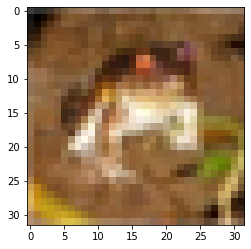

In [17]:
plt.imshow(train_data.data[0])
plt.show()

In [18]:
type(train_data[0]), len(train_data[0])

(tuple, 2)

In [19]:
type(train_data[0][0]), type(train_data[0][1])

(torch.Tensor, int)

In [20]:
type(train_data[0][0])

torch.Tensor

In [21]:
train_data[0][0].numpy().shape

(3, 32, 32)

In [22]:
train_data[0][0].numpy().transpose(1, 2, 0).shape

(32, 32, 3)

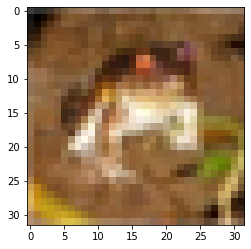

In [23]:
plt.imshow(train_data[0][0].numpy().transpose(1, 2, 0))

In [24]:
# label=6，对应frog青蛙
train_data[0][1]

6

In [25]:
len(train_data.targets), train_data.targets[:5]

(50000, [6, 9, 9, 4, 1])

## 1.3 重新加载数据集 
增加数据增强

In [26]:
train_mean = traindata.mean(axis=0) / 255.0
train_std = traindata.std(axis=0) / 255.0

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),    # 默认以一半的概率水平（左右）翻转图像
    transforms.ToTensor(),
    transforms.Normalize(train_mean, train_std),   # 对每个通道标准化
    ])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(train_mean, train_std),
    ])

In [27]:
# 数据加载
train_data = CIFAR10(root='./root/cifar10',
                     train=True,
                     transform=train_transform,
                     download=False)

In [28]:
test_data = CIFAR10(root='./root/cifar10',
                    train=False,
                    transform=test_transform,
                    download=False)

## 1.4 数据集分批
```
DataLoader(
    dataset, batch_size=1, shuffle=False, sampler=None,
    batch_sampler=None, num_workers=0, collate_fn=None,
    pin_memory=False, drop_last=False, timeout=0,
    worker_init_fn=None, multiprocessing_context=None, generator=None)
```

In [29]:
# 超参数
BATCH_SIZE = 128

train_loader = DataLoader(dataset=train_data,
                          batch_size=BATCH_SIZE,
                          num_workers=2,
                          shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE)

# 2 ResNet18 模型 

## 2.1 建模

In [39]:
# pretrained 如果为真，则返回在ImageNet上预训练的模型
net_model = resnet50(pretrained=True)

In [40]:
# net_model.buffers

## 2.2 编译模型

In [41]:
# 超参数 学习率
LR = 1e-3

# 损失函数
criterion = nn.CrossEntropyLoss()
# 优化器
optimizer = optim.Adam(net_model.parameters(), lr=LR)
# 定义device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net_model.to(device)
print("覆盖上一行代码会输出的模型架构信息 ")

覆盖上一行代码会输出的模型架构信息 


## 2.3 训练

In [42]:
for t in train_loader:
    print(type(t))
    print(len(t))
    print(type(t[0]), type(t[1]))
    print(t[0].shape, t[1].shape)
    break

<class 'list'>
2
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([128, 3, 32, 32]) torch.Size([128])


In [43]:
# type(train_loader)

In [44]:
EPOCH = 100

costs = []
epoch_bar = trange(EPOCH)

for epoch in epoch_bar:
    epoch_bar.set_description("epoch:{}".format(epoch + 1))
    start = time.time()
    losses = []
    for i, data in enumerate(train_loader):
        feats, labels = data
        feats, labels = feats.to(device), labels.to(device)
        # 前向传播 等价于net_model(feats)
        outputs = net_model.forward(feats)
        # 计算损失函数
        loss = criterion(outputs, labels)
        losses.append(loss.item())
        # 清空梯度
        optimizer.zero_grad()
        # 反向传播
        loss.backward()
        # 参数更新
        optimizer.step()
    if not losses:
      print(epoch, i, feats.shape)
      break
    batch_mean_loss = np.mean(losses)
    costs.append(batch_mean_loss)
    if batch_mean_loss <= 0.01:
      print(f"epoch:{epoch} , loss <= 0.01，停止循环")
      break
    if epoch % 5 == 0:
        print("epoch:{} loss:{:.4f} 耗时:{:.1f}s".format(epoch + 1, batch_mean_loss, time.time() - start))
    
    

epoch:1 loss:0.9053 耗时:43.8s
epoch:6 loss:0.3198 耗时:43.2s
epoch:11 loss:0.3470 耗时:43.2s
epoch:16 loss:0.1465 耗时:43.1s
epoch:21 loss:0.2880 耗时:43.2s
epoch:26 loss:0.1039 耗时:43.1s
epoch:31 loss:0.0724 耗时:43.1s
epoch:36 loss:0.0585 耗时:43.2s
epoch:41 loss:0.0478 耗时:43.2s
epoch:46 loss:0.0466 耗时:43.3s
epoch:51 loss:0.0447 耗时:43.2s
epoch:56 loss:0.0410 耗时:42.9s
epoch:61 loss:0.0270 耗时:42.9s
epoch:66 loss:0.0285 耗时:43.0s
epoch:71 loss:0.0206 耗时:42.9s
epoch:76 loss:0.0285 耗时:42.9s
epoch:81 loss:0.0259 耗时:42.9s
epoch:86 loss:0.0235 耗时:43.0s
epoch:91 loss:0.0319 耗时:43.0s
epoch:96 loss:0.0152 耗时:43.1s



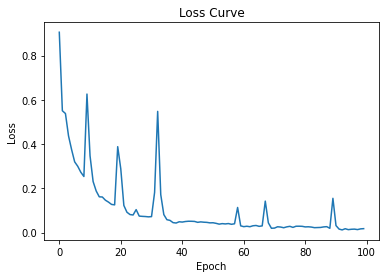

In [45]:
plt.plot(range(EPOCH), costs)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss Curve")
plt.show()

## 2.4 保存模型

In [46]:
torch.save(net_model, "cifar10_resnet50.pt")
# 加载模型的命令
# model = torch.load("cifar10_resnet18.pt")

## 2.5 用模型测试——准确率

In [52]:
net_model.eval()

correct, total = 0, 0
for data in test_loader:
    feats, labels = data
    feats, labels = feats.to(device), labels.to(device)
    # 前向传播
    out = net_model(feats)
    # 预测
    _, pred = torch.max(out.data, 1)
    # 判断预测与实际是否一致
    total += labels.size(0)
    correct += (pred == labels).sum().item()
    
print("在测试集10000章图像上的准确率:{:.2f}%%".format(correct / total *100))

在测试集10000章图像上的准确率:85.41%%


# 3 总结：

1. 这次除了练习了搭建神经网络的流程，还试了数据增强的水平翻转、按通道进行标准化的方法；
2. 对于按通道求标准化时，对于如何获得各通道的均值和标准差，一开始陷入了误区，网上找到的都是读取本地图片，for循环逐个计算；最后才想到用数组的reshape，使用mean()和std()就能直接计算；
3. ResNet18和ResNet50我都测试了，同样的LR、EPOCH、BATCH_SIZE，同样的数据增强措施，只是网络架构不同，准确率ResNet18是83.79%，ResNet50是85.41%。